In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 10 to 2791
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       147 non-null    int64  
 1   QUANTITYORDERED   147 non-null    int64  
 2   PRICEEACH         147 non-null    float64
 3   ORDERLINENUMBER   147 non-null    int64  
 4   SALES             147 non-null    float64
 5   ORDERDATE         147 non-null    object 
 6   STATUS            147 non-null    object 
 7   QTR_ID            147 non-null    int64  
 8   MONTH_ID          147 non-null    int64  
 9   YEAR_ID           147 non-null    int64  
 10  PRODUCTLINE       147 non-null    object 
 11  MSRP              147 non-null    int64  
 12  PRODUCTCODE       147 non-null    object 
 13  CUSTOMERNAME      147 non-null    object 
 14  PHONE             147 non-null    object 
 15  ADDRESSLINE1      147 non-null    object 
 16  ADDRESSLINE2      147 non-null    object 


In [13]:
data['STATUS'].value_counts()

Shipped       134
In Process     13
Name: STATUS, dtype: int64

In [14]:
data['STATUS'] = data['STATUS'].map({"Shipped": 1, "In Process": 0})

In [15]:
X = data.drop(columns = ['ORDERDATE', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'])

In [16]:
errors = []
for i in tqdm.tqdm(range(3, 11)):
    kmc = KMeans(n_clusters = i, random_state=42)
    kmc.fit(X)
    errors.append(kmc.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 12.32it/s]


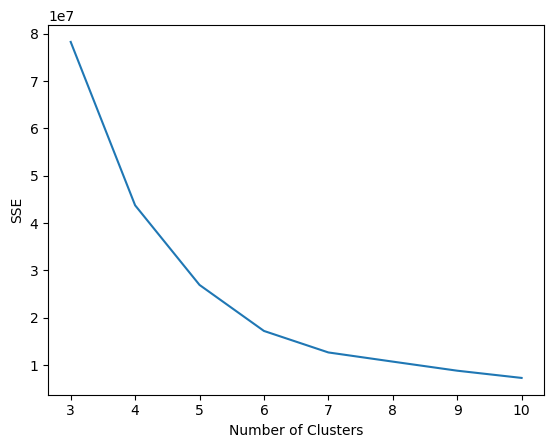

In [17]:
plt.plot(range(3, 11), errors)
plt.xticks(range(3, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [18]:
kmc = KMeans(n_clusters = 5, random_state=42)
kmc.fit(X)

KMeans(n_clusters=5, random_state=42)